In [44]:
import spacy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
data = pd.read_json("data/news_dataset.json")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 0 to 7499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      7500 non-null   object
 1   category  7500 non-null   object
dtypes: object(2)
memory usage: 175.8+ KB


In [4]:
data.head()

,text,category
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS
3,This Richard Sherman Interception Literally Sh...,SPORTS
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS


In [5]:
data.isnull().sum()

text        0
category    0
dtype: int64

In [6]:
data.duplicated().sum()

3

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.category.value_counts()

category
SPORTS      2500
BUSINESS    2499
CRIME       2498
Name: count, dtype: int64

In [10]:
nlp = spacy.load("en_core_web_lg")

In [11]:
def preprocess(text):
    doc = nlp(text)
    processed = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

    return " ".join(processed)

In [12]:
news_data = data.copy()

In [13]:
news_data["processed_text"] = news_data["text"].apply(preprocess)

In [14]:
news_data["category_num"] = news_data["category"].map({"SPORTS": 0, "BUSINESS": 1, "CRIME": 2})

In [15]:
news_data.head()

,text,category,processed_text,category_num
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,Larry Nassar blame victim say victimize newly ...,2
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,woman Beats Cancer die fall horse,2
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,vegas taxpayer spend Record $ 750 million New ...,0
3,This Richard Sherman Interception Literally Sh...,SPORTS,Richard Sherman Interception literally shake W...,0
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,7 thing totally kill Weed Legalization Buzz,1


In [16]:
news_data["vector"] = news_data["processed_text"].apply(lambda text: nlp(text).vector)

In [17]:
news_data.head()

,text,category,processed_text,category_num,vector
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,Larry Nassar blame victim say victimize newly ...,2,"[-0.5585511, -0.29323253, -0.9253956, 0.189389..."
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,woman Beats Cancer die fall horse,2,"[-0.73039824, -0.43196002, -1.2930516, -1.0628..."
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,vegas taxpayer spend Record $ 750 million New ...,0,"[-1.9413117, 0.121578515, -3.2996283, 1.511650..."
3,This Richard Sherman Interception Literally Sh...,SPORTS,Richard Sherman Interception literally shake W...,0,"[-1.4702771, -0.685319, 0.57398, -0.31135806, ..."
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,7 thing totally kill Weed Legalization Buzz,1,"[-1.037173, -1.9495698, -1.7179357, 1.2975286,..."


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    news_data["vector"],
    news_data["category_num"],
    test_size=0.2,
    random_state=42,
    stratify= news_data.category_num
)

In [31]:
X_train[7333]

array([ 0.7698    ,  0.05466182,  0.424395  ,  1.0614231 ,  0.99555165,
        0.18110777,  1.4731458 , -0.21230006,  0.5672734 , -0.46399498,
        2.1490667 ,  0.47845045, -1.9216633 ,  2.7344668 , -2.17356   ,
        1.6039    ,  1.4168483 ,  4.0163097 ,  0.5954666 ,  0.3182233 ,
        0.13396668,  2.1354501 , -1.0658499 ,  1.1234499 ,  0.8400666 ,
        0.47579002, -4.345465  , -0.51955503, -1.3755451 , -1.8203932 ,
       -0.43779668,  1.6565117 ,  1.0616235 , -0.25044653,  0.56991667,
        4.7884936 , -0.14421666, -1.6916666 , -1.5170417 , -1.6992917 ,
       -0.6168666 ,  0.9881167 , -1.3513824 ,  2.5011966 , -3.2245667 ,
        0.9673932 ,  1.6135083 , -1.6620499 ,  0.2948167 , -1.40135   ,
       -1.1026384 ,  0.77282166, -2.3869984 , -2.3714168 , -0.61088675,
        0.40073666, -2.4328668 ,  0.67076176,  0.98898166, -0.19976336,
        3.028135  , -0.7307717 , -1.9045833 , -0.30974   ,  1.3297766 ,
        0.97823167, -2.6636832 , -2.692495  ,  0.7521817 ,  3.20

In [32]:
X_train_2d = np.stack(X_train)
X_train_2d

array([[-0.33570996, -0.12325662,  0.78636163, ..., -1.7421765 ,
        -0.28878915,  0.6820142 ],
       [-1.0237294 ,  0.12755007, -0.6709677 , ..., -2.261407  ,
         0.3394955 ,  1.5361369 ],
       [-0.8296363 ,  0.75169504, -3.1397214 , ...,  0.7034175 ,
        -1.7333751 ,  1.1266608 ],
       ...,
       [-2.9287288 ,  0.7496004 , -0.9369309 , ..., -0.5229884 ,
         0.22239815, -0.5242516 ],
       [-0.72245884,  2.3423965 ,  0.6561788 , ...,  0.08592092,
         0.6537334 , -0.51812327],
       [ 0.39009628,  0.9161974 , -0.58008   , ..., -3.4955215 ,
        -2.8626835 ,  0.5195931 ]], dtype=float32)

In [33]:
X_test_2d = np.stack(X_test)

#### Naive Bayes:

In [34]:
naive_pipe = Pipeline([
    ("scale", MinMaxScaler()),
    ("clf", MultinomialNB()) 
])

In [35]:
naive_pipe.fit(X_train_2d, y_train)

Pipeline(steps=[('scale', MinMaxScaler()), ('clf', MultinomialNB())])

In [36]:
y_pred = naive_pipe.predict(X_test_2d)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       486
           1       0.81      0.82      0.81       498
           2       0.88      0.85      0.87       516

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



#### Decision Tree Classification

In [37]:
decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train_2d, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = decision_tree_clf.predict(X_test_2d)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       486
           1       0.72      0.75      0.73       475
           2       0.76      0.71      0.73       539

    accuracy                           0.74      1500
   macro avg       0.74      0.74      0.74      1500
weighted avg       0.74      0.74      0.74      1500



#### KNN Classifier:

In [39]:
knn_clf = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn_clf.fit(X_train_2d, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [40]:
y_pred = knn_clf.predict(X_test_2d)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       487
           1       0.84      0.86      0.85       489
           2       0.88      0.84      0.86       524

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.85      1500



#### Random Forest Classifier:

In [41]:
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train_2d, y_train)

RandomForestClassifier()

In [42]:
y_pred = random_forest_clf.predict(X_test_2d)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       501
           1       0.85      0.89      0.87       482
           2       0.90      0.87      0.89       517

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500



#### Gradient Boosting Classifier

In [43]:
gradient_boosting_clf = GradientBoostingClassifier()
gradient_boosting_clf.fit(X_train_2d, y_train)

GradientBoostingClassifier()

In [45]:
y_pred = gradient_boosting_clf.predict(X_test_2d)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       498
           1       0.88      0.89      0.89       495
           2       0.91      0.90      0.90       507

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



Text(70.72222222222221, 0.5, 'Truth')

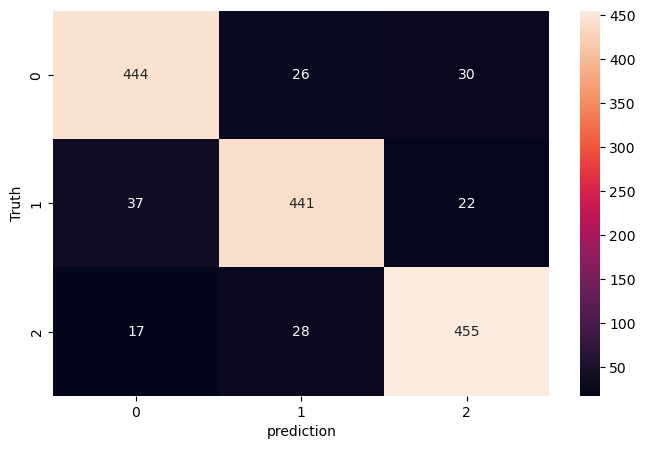

In [47]:
confusion = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 5))
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("prediction")
plt.ylabel("Truth")